# I. Basic statistics

,Item,2019,2020,2021,2022,2023
0,Full-time Equivalent of R&D Personnel (10 000 ...,480.1,523.5,571.6,635.4,724.1
1,Basic Research (Personnel),39.2,42.7,47.2,50.9,57.5
2,Applied Research (Personnel),61.5,64.3,69.1,74.1,77.7
3,Experimental Development (Personnel),379.4,416.5,455.3,510.3,588.9
4,Expenditure on R&D (100 million yuan),22143.6,24393.1,27956.3,30782.9,33357.1



Các mục dữ liệu có trong file:
['Full-time Equivalent of R&D Personnel (10 000 man-years)'
 'Basic Research (Personnel)' 'Applied Research (Personnel)'
 'Experimental Development (Personnel)'
 'Expenditure on R&D (100 million yuan)'
 'Expenditure on Basic Research (100 million yuan)'
 'Expenditure on Applied Research (100 million yuan)'
 'Expenditure on Experimental Development (100 million yuan)'
 'Government Funds for R&D (100 million yuan)'
 'Enterprises Funds for R&D (100 million yuan)'
 'Ratio of R&D Expenditure to GDP (%)'
 'Scientific Papers Issued (10 000 pieces)'
 'Publications on Science and Technology (kind)'
 'Number of Major Achievements in Science and Technology (item)'
 'Number of National Invention Prizes Awarded (item)'
 'Number of National Scientific and Technological Progress Prizes Awarded (item)'
 'Number of Patent Applications (piece)'
 'Invention Patent Applications (piece)' 'Number of Patent Grants (piece)'
 'Granted Invention Patents (piece)'
 'Total Value of 

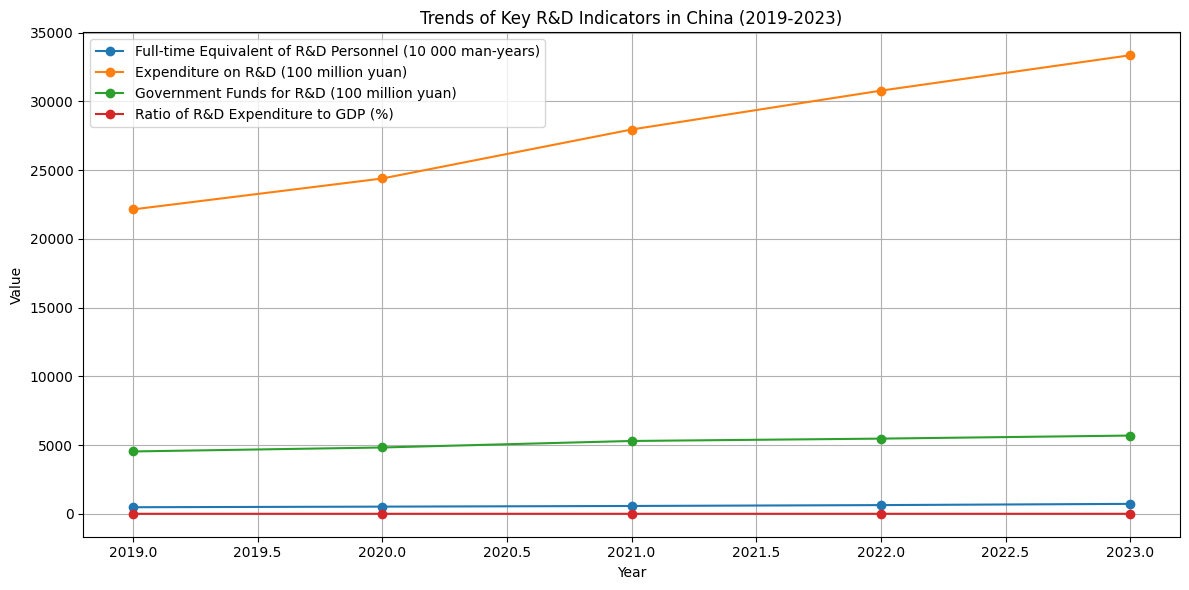


Thống kê mô tả:


,count,mean,std,min,25%,50%,75%,max
2019,22.0,411945.733636,1.076762e+06,2.24,693.975,10496.0,44649.75,4380468.0
2020,24.0,463261.842083,1.278691e+06,2.41,361.125,7292.0,33597.50,5194154.0
2021,24.0,517248.280417,1.402772e+06,2.43,392.225,9045.5,40615.50,5243592.0
2022,24.0,517164.244167,1.388240e+06,2.56,436.475,8536.5,47173.75,5364639.0
2023,22.0,552062.597727,1.401138e+06,2.65,1107.850,11819.5,58601.50,5561990.0



Tỷ lệ tăng trưởng trung bình hàng năm (CAGR):
Full-time Equivalent of R&D Personnel (10 000 man-years): 10.82%
Basic Research (Personnel): 10.05%
Applied Research (Personnel): 6.02%
Experimental Development (Personnel): 11.62%
Expenditure on R&D (100 million yuan): 10.79%
Expenditure on Basic Research (100 million yuan): 14.04%
Expenditure on Applied Research (100 million yuan): 10.03%
Expenditure on Experimental Development (100 million yuan): 10.64%
Government Funds for R&D (100 million yuan): 5.84%
Enterprises Funds for R&D (100 million yuan): 11.86%
Ratio of R&D Expenditure to GDP (%): 4.29%
Scientific Papers Issued (10 000 pieces): 2.71%
Publications on Science and Technology (kind): -1.02%
Number of Major Achievements in Science and Technology (item): 8.04%
Number of National Invention Prizes Awarded (item): nan%
Number of National Scientific and Technological Progress Prizes Awarded (item): nan%
Number of Patent Applications (piece): 6.15%
Invention Patent Applications (piece):

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV
file_path = "20-1 Basic Statistics on Scientific and Technological Activities.csv"  # đảm bảo bạn đã lưu dữ liệu vào file này

df = pd.read_csv(file_path)

# Hiển thị vài dòng đầu tiên
display(df.head())

# Chuyển đổi dữ liệu nếu cần (ví dụ: loại bỏ khoảng trắng, NA)
df.columns = df.columns.str.strip()
df = df.dropna(how='all')

# Chuyển đổi dữ liệu từ wide sang long để dễ vẽ biểu đồ
df_long = df.melt(id_vars="Item", var_name="Year", value_name="Value")
df_long["Year"] = df_long["Year"].astype(int)

# Một số phân tích cơ bản
print("\nCác mục dữ liệu có trong file:")
print(df["Item"].unique())

# Vẽ xu hướng một số chỉ số quan trọng theo thời gian
important_items = [
    "Full-time Equivalent of R&D Personnel (10 000 man-years)",
    "Expenditure on R&D (100 million yuan)",
    "Government Funds for R&D (100 million yuan)",
    "Ratio of R&D Expenditure to GDP (%)"
]

plt.figure(figsize=(12, 6))
for item in important_items:
    data = df_long[df_long["Item"] == item]
    plt.plot(data["Year"], data["Value"], marker='o', label=item)

plt.title("Trends of Key R&D Indicators in China (2019-2023)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Phân tích thống kê mô tả
df_stats = df.drop(columns="Item").astype(float).describe().T
print("\nThống kê mô tả:")
display(df_stats)

# Tính tỷ lệ tăng trưởng trung bình hàng năm (CAGR)
def calculate_cagr(start, end, periods):
    return ((end / start) ** (1 / periods) - 1) * 100

print("\nTỷ lệ tăng trưởng trung bình hàng năm (CAGR):")
cagr_results = {}
for index, row in df.iterrows():
    try:
        start = float(row["2019"])
        end = float(row["2023"])
        cagr = calculate_cagr(start, end, 4)
        cagr_results[row["Item"]] = round(cagr, 2)
    except:
        continue

for item, cagr in cagr_results.items():
    print(f"{item}: {cagr}%")


Thông tin tổng quan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Item    24 non-null     object 
 1   2019    24 non-null     float64
 2   2020    24 non-null     float64
 3   2021    24 non-null     float64
 4   2022    24 non-null     float64
 5   2023    24 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.3+ KB
None

5 dòng đầu tiên:
                                                Item     2019     2020  \
0  Full-time Equivalent of R&D Personnel (10 000 ...    480.1    523.5   
1                         Basic Research (Personnel)     39.2     42.7   
2                       Applied Research (Personnel)     61.5     64.3   
3               Experimental Development (Personnel)    379.4    416.5   
4              Expenditure on R&D (100 million yuan)  22143.6  24393.1   

      2021     2022     2023  
0    571.6    635.4    724.1  

C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_4316\893144517.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # hoặc df.fillna(0)


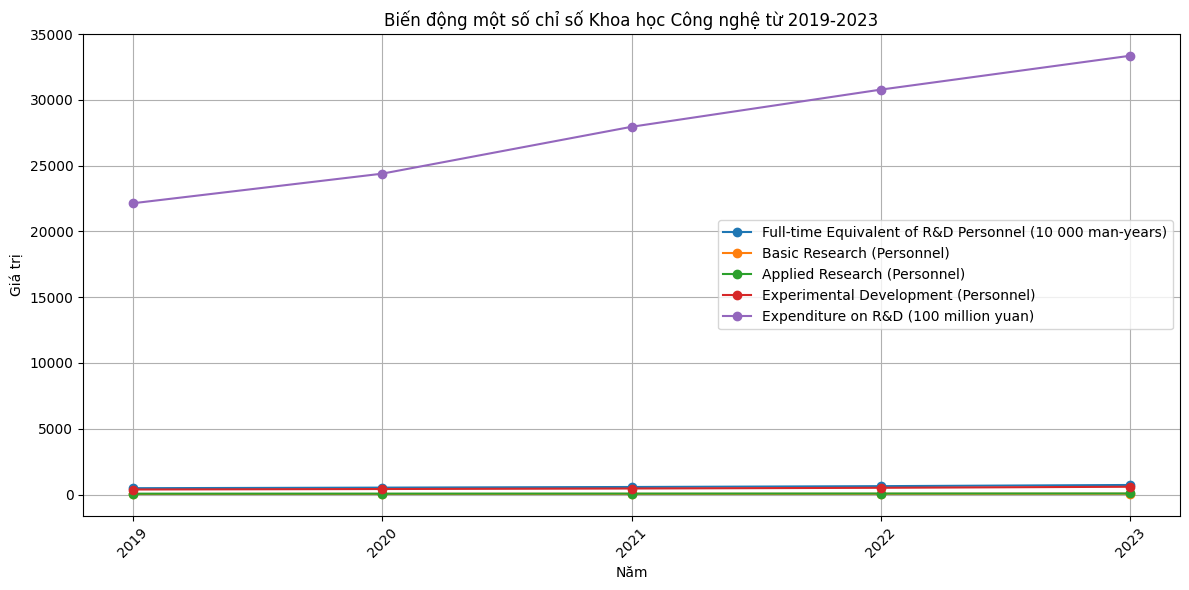

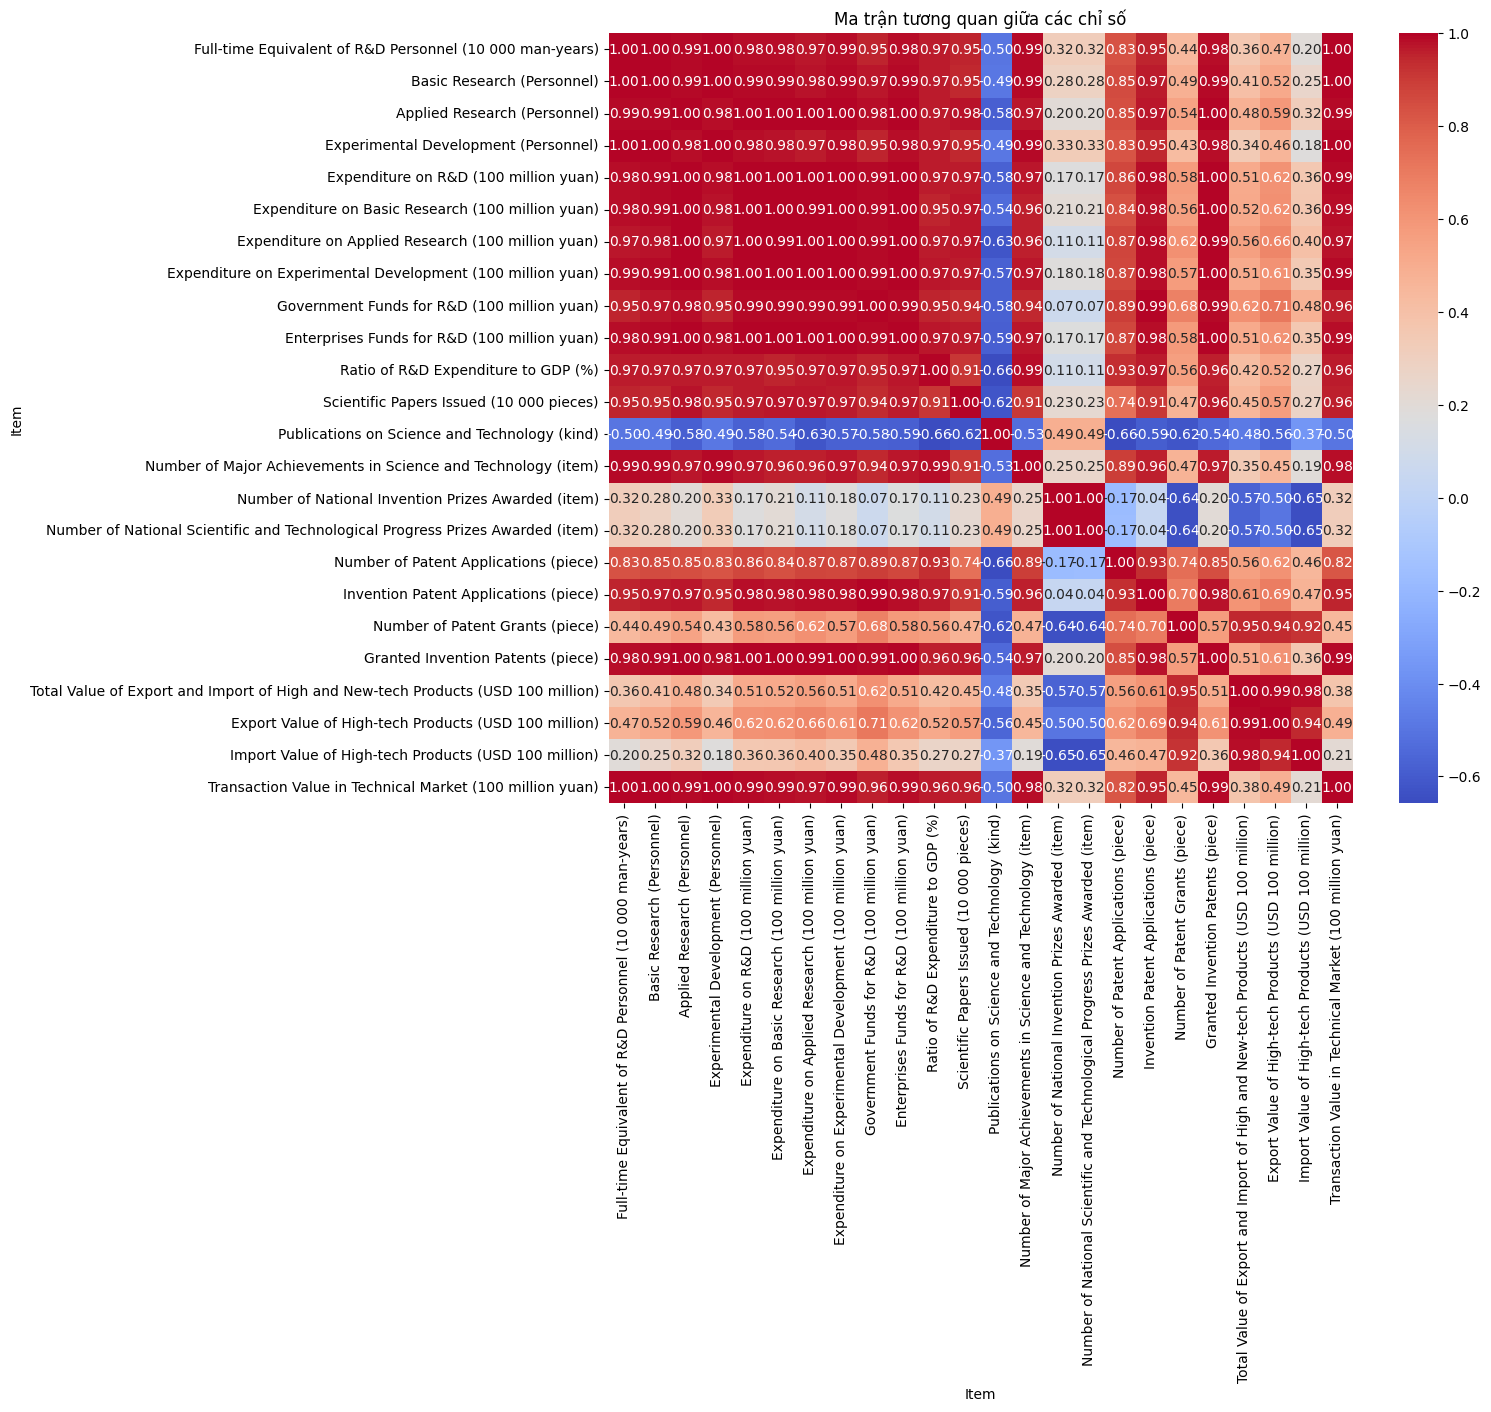

In [4]:
# 3. Kiểm tra dữ liệu ban đầu
print("Thông tin tổng quan:")
print(df.info())
print("\n5 dòng đầu tiên:")
print(df.head())

# 4. Tiền xử lý: đổi tên cột nếu cần
df.columns = ['Item', '2019', '2020', '2021', '2022', '2023']

# 5. Xử lý missing value (nếu có)
print("\nGiá trị thiếu:")
print(df.isnull().sum())

# Có thể điền giá trị thiếu nếu cần:
df.fillna(method='ffill', inplace=True)  # hoặc df.fillna(0)

# 6. Chuyển định dạng: từ hàng -> cột (để dễ trực quan hóa)
df_melt = df.melt(id_vars='Item', var_name='Year', value_name='Value')
df_melt['Value'] = pd.to_numeric(df_melt['Value'], errors='coerce')

# 7. Một số biểu đồ EDA cơ bản
plt.figure(figsize=(12,6))
top_items = df['Item'].head(5)
for item in top_items:
    data = df_melt[df_melt['Item'] == item]
    plt.plot(data['Year'], data['Value'], marker='o', label=item)

plt.title("Biến động một số chỉ số Khoa học Công nghệ từ 2019-2023")
plt.xlabel("Năm")
plt.ylabel("Giá trị")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8. Phân tích chuyên sâu hơn
pivot_df = df.set_index('Item').T
pivot_df = pivot_df.apply(pd.to_numeric, errors='coerce')
correlation = pivot_df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Ma trận tương quan giữa các chỉ số")
plt.show()


IndexError: index 8 is out of bounds for axis 0 with size 8

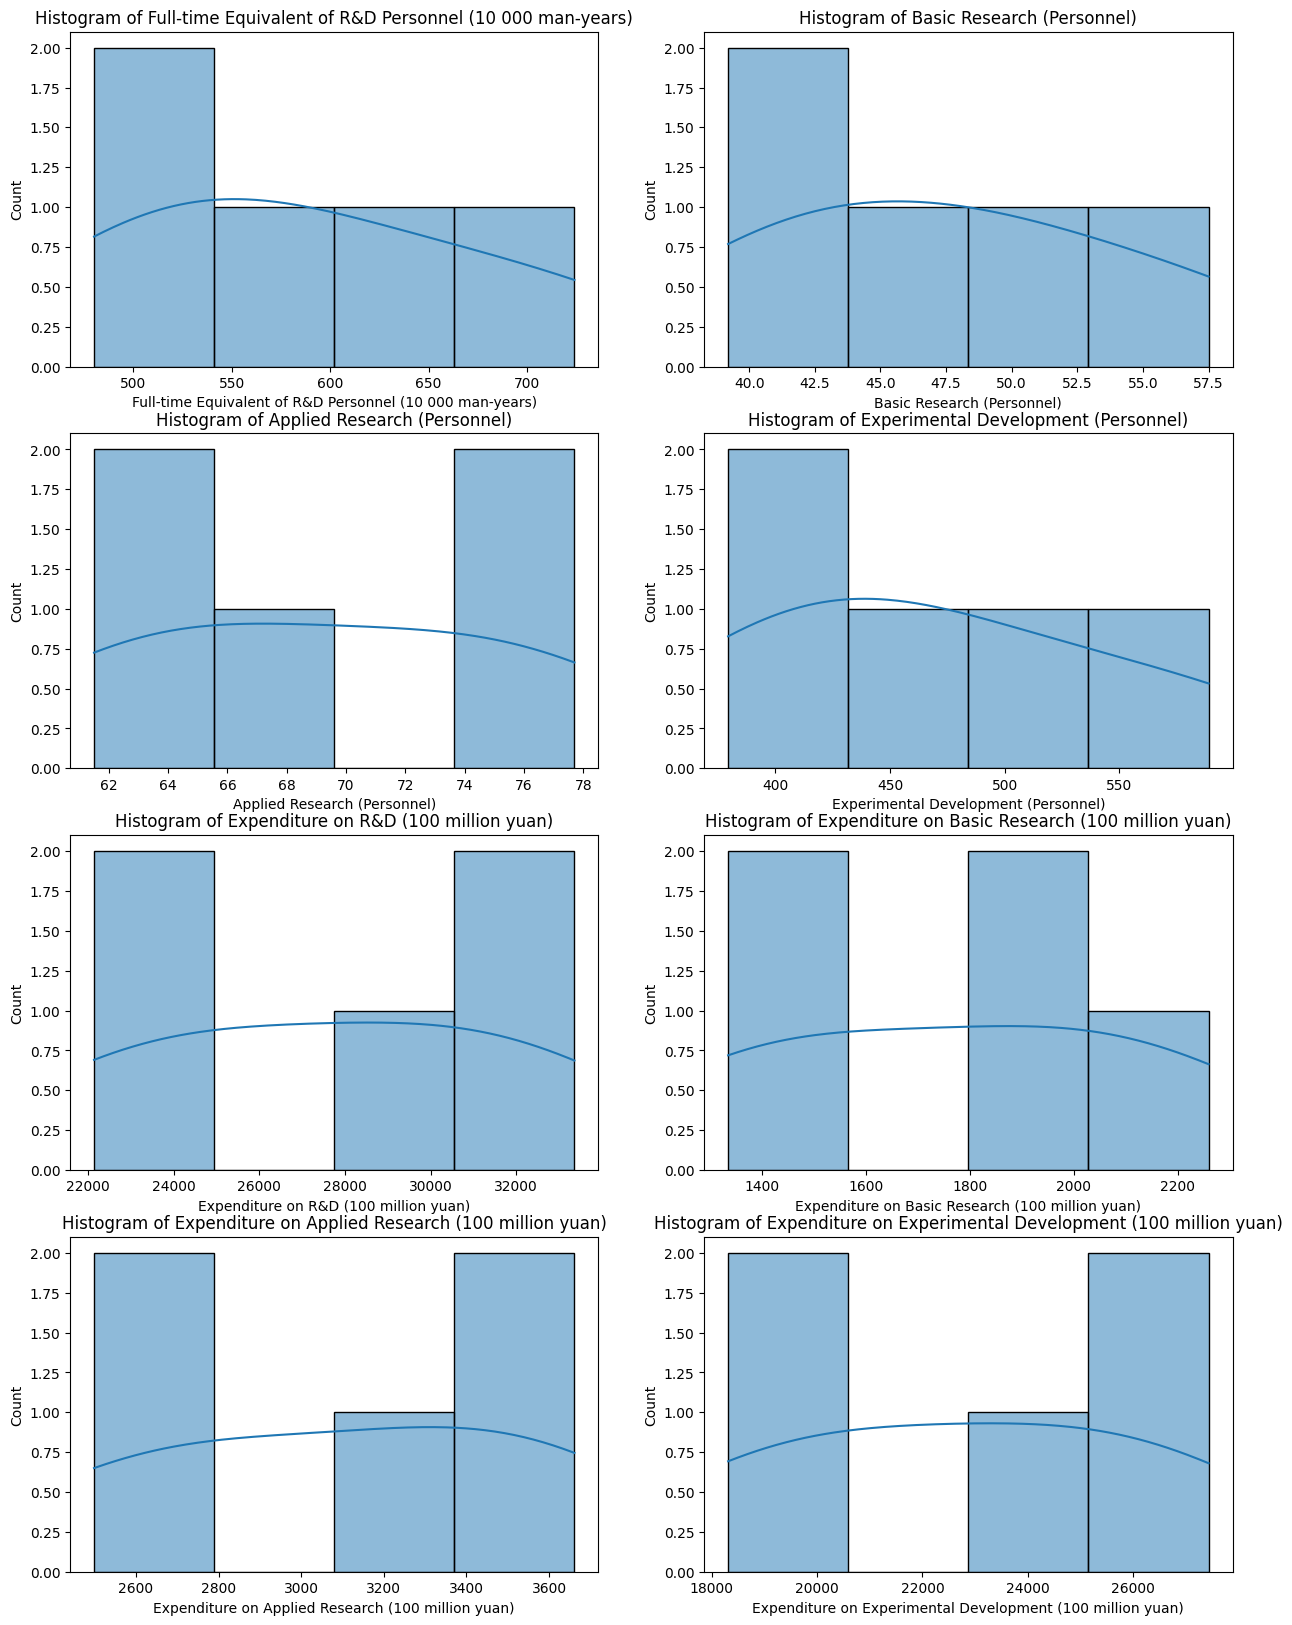

In [5]:
# Biểu đồ Histogram cho từng chỉ số
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))
axes = axes.flatten()
for i, col in enumerate(pivot_df.columns):
    sns.histplot(pivot_df[col], ax=axes[i], kde=True)
    axes[i].set_title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

# Boxplot cho các chỉ số theo năm
plt.figure(figsize=(15,8))
sns.boxplot(data=df_melt, x='Year', y='Value', hue='Item')
plt.title("Boxplot of R&D Indicators by Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


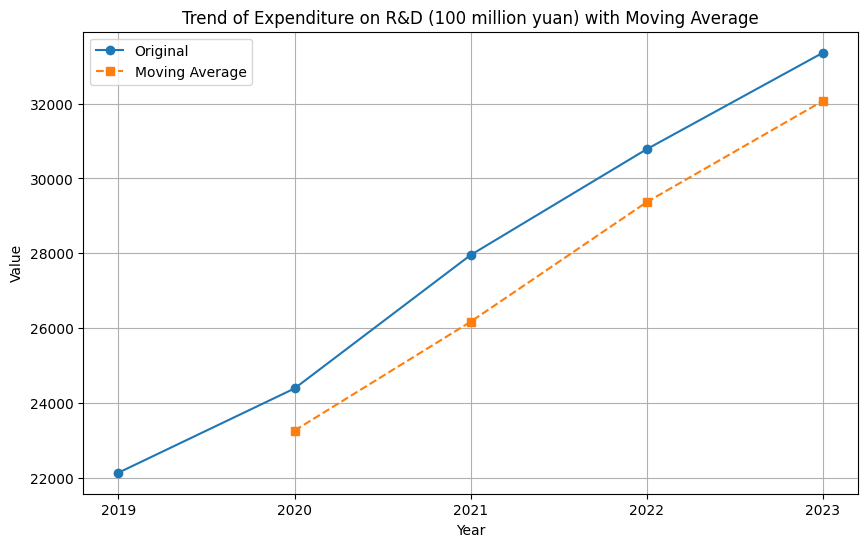

In [6]:
# Vẽ biểu đồ đường cùng với moving average cho một chỉ số cụ thể
item = "Expenditure on R&D (100 million yuan)"
data = df_melt[df_melt['Item'] == item].sort_values("Year")
data['Moving_Avg'] = data['Value'].rolling(window=2).mean()

plt.figure(figsize=(10,6))
plt.plot(data['Year'], data['Value'], marker='o', label="Original")
plt.plot(data['Year'], data['Moving_Avg'], marker='s', label="Moving Average", linestyle="--")
plt.title(f"Trend of {item} with Moving Average")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


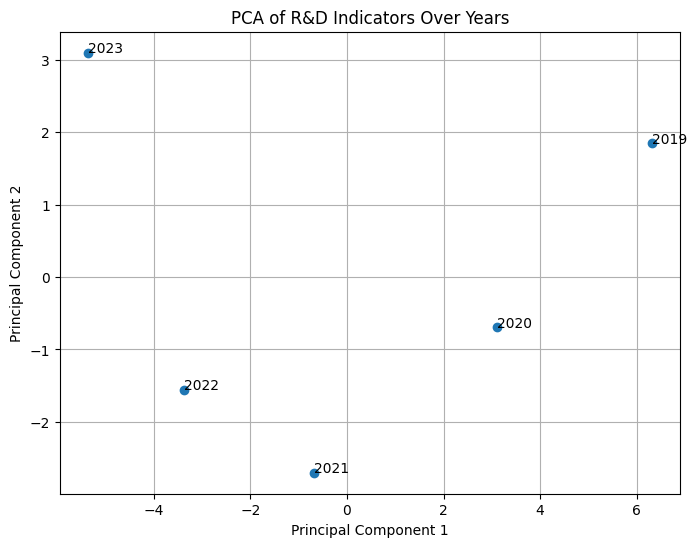

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = scaler.fit_transform(pivot_df)

# Áp dụng PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"], index=pivot_df.index)

# Vẽ biểu đồ PCA
plt.figure(figsize=(8,6))
plt.scatter(pca_df["PC1"], pca_df["PC2"])
for i, year in enumerate(pca_df.index):
    plt.annotate(year, (pca_df["PC1"].iloc[i], pca_df["PC2"].iloc[i]))
plt.title("PCA of R&D Indicators Over Years")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


# II. Statics on high-technology industry

In [24]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv("20-18 Statistics on High-tech Industry (Manufacturing Industry) (2023).csv",sep=",", engine="python")

# Xem tổng quan
print(df.head())
print("\nCác cột dữ liệu:", df.columns.tolist())


                                            Industry  R&D Institutions (unit)  \
0                                              Total                    25821   
1                           Manufacture of Medicines                     4745   
2                   Manufacture of Chemical Medicine                     1699   
3  Manufacture of Finished Traditional Chinese He...                      809   
4          Manufacture of Biopharmaceutical Products                      622   

   Full-time Equivalent of R&D Personnel (man-year)  Expenditure on R&D (10  \
0                                           1397796                69602196   
1                                            191292                10963162   
2                                             86015                 5017268   
3                                             32177                 1204168   
4                                             35347                 3576026   

   000 yuan)  R&D Projects (unit)  \
0

In [26]:
print(len(df.columns))
print(df.columns.tolist())


16
['Industry', 'R&D Institutions (unit)', 'Full-time Equivalent of R&D Personnel (man-year)', 'Expenditure on R&D (10', '000 yuan)', 'R&D Projects (unit)', 'Number of Projects on New Products Development (unit)', 'Expenditure on New Products Development (10', '000 yuan).1', 'Sales Revenue of New Products (10', '000 yuan).2', 'Export (10', '000 yuan).3', 'Patent Applications (piece)', 'Invention Applications (piece)', 'Effective Inventions (piece)']


In [27]:
# Gộp thủ công đúng tên cột
df.columns = [
    'Industry',
    'R&D Institutions (unit)',
    'Full-time Equivalent of R&D Personnel (man-year)',
    'Expenditure on R&D (10,000 yuan)',
    'R&D Projects (unit)',
    'Number of Projects on New Products Development (unit)',
    'Expenditure on New Products Development (10,000 yuan)',
    'Sales Revenue of New Products (10,000 yuan)',
    'Export (10,000 yuan)',
    'Patent Applications (piece)',
    'Invention Applications (piece)',
    'Effective Inventions (piece)',
    'dummy_1',  # cột rác
    'dummy_2',  # cột rác
    'dummy_3',  # cột rác
    'dummy_4'   # cột rác
]


In [28]:
df = df.drop(columns=['dummy_1', 'dummy_2', 'dummy_3', 'dummy_4'])


In [29]:
print(df.columns)


Index(['Industry', 'R&D Institutions (unit)',
       'Full-time Equivalent of R&D Personnel (man-year)',
       'Expenditure on R&D (10,000 yuan)', 'R&D Projects (unit)',
       'Number of Projects on New Products Development (unit)',
       'Expenditure on New Products Development (10,000 yuan)',
       'Sales Revenue of New Products (10,000 yuan)', 'Export (10,000 yuan)',
       'Patent Applications (piece)', 'Invention Applications (piece)',
       'Effective Inventions (piece)'],
      dtype='object')


In [30]:
top_rnd = df.sort_values(by='Expenditure on R&D (10,000 yuan)', ascending=False).head(10)
print("🔝 Top 10 ngành có chi tiêu R&D cao nhất:")
print(top_rnd[['Industry', 'Expenditure on R&D (10,000 yuan)']])


🔝 Top 10 ngành có chi tiêu R&D cao nhất:
                                             Industry  \
0                                               Total   
5   Manufacture of Electronic Equipment and Commun...   
9   Manufacture of Communication Equipment, Radar ...   
11    Manufacture of Communication Terminal Equipment   
15               Manufacture of Electronic Appliances   
1                            Manufacture of Medicines   
20  Manufacture of Electronic Components and Elect...   
31       Manufacture of Medical Equipments and Meters   
18                  Manufacture of Integrated Circuit   
2                    Manufacture of Chemical Medicine   

    Expenditure on R&D (10,000 yuan)  
0                           69602196  
5                           46453804  
9                           16175596  
11                          12326579  
15                          11232092  
1                           10963162  
20                           8057518  
31                 

In [31]:
top_rnd_people = df.sort_values(by='Full-time Equivalent of R&D Personnel (man-year)', ascending=False).head(10)
print("👥 Top ngành có nhiều nhân sự R&D nhất:")
print(top_rnd_people[['Industry', 'Full-time Equivalent of R&D Personnel (man-year)']])


👥 Top ngành có nhiều nhân sự R&D nhất:
                                             Industry  \
0                                               Total   
5   Manufacture of Electronic Equipment and Commun...   
9   Manufacture of Communication Equipment, Radar ...   
20  Manufacture of Electronic Components and Elect...   
15               Manufacture of Electronic Appliances   
1                            Manufacture of Medicines   
11    Manufacture of Communication Terminal Equipment   
31       Manufacture of Medical Equipments and Meters   
26     Manufacture of Computers and Office Equipments   
2                    Manufacture of Chemical Medicine   

    Full-time Equivalent of R&D Personnel (man-year)  
0                                            1397796  
5                                             898893  
9                                             250009  
20                                            207164  
15                                            194906  
1  

<Figure size 1200x600 with 0 Axes>

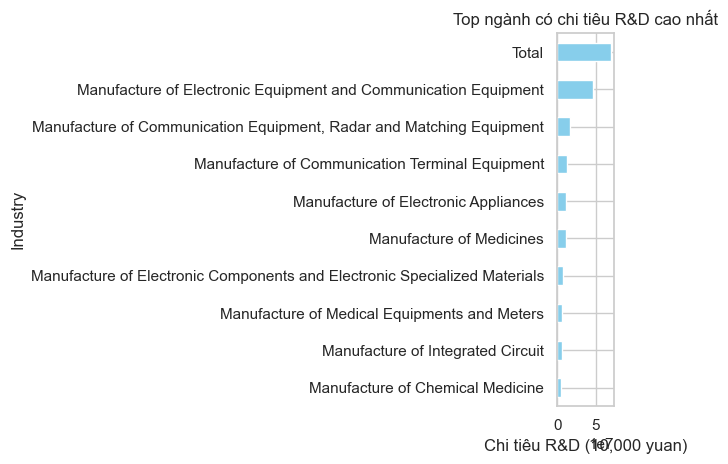

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
top_rnd.plot(kind='barh', x='Industry', y='Expenditure on R&D (10,000 yuan)', legend=False, color='skyblue')
plt.title('Top ngành có chi tiêu R&D cao nhất')
plt.xlabel('Chi tiêu R&D (10,000 yuan)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [33]:
df['Revenue_to_DevCost_Ratio'] = df['Sales Revenue of New Products (10,000 yuan)'] / df['Expenditure on New Products Development (10,000 yuan)']

top_effective_dev = df.sort_values(by='Revenue_to_DevCost_Ratio', ascending=False).head(10)
print("⚖️ Hiệu quả phát triển sản phẩm mới (Doanh thu / Chi phí):")
print(top_effective_dev[['Industry', 'Revenue_to_DevCost_Ratio']])


⚖️ Hiệu quả phát triển sản phẩm mới (Doanh thu / Chi phí):
                                             Industry  \
27                     Manufacture of Entire Computer   
14  Manufacture of Non-professional Audio-visual E...   
37               Manufacture of Information Chemicals   
26     Manufacture of Computers and Office Equipments   
23    Manufacture of Electronic Specialized Materials   
24  Manufacturing of Intelligent Consumption Equip...   
7   Manufacture of Optical Fiber and Cable, and Li...   
8                Manufacture of Lithium Ion Batteries   
3   Manufacture of Finished Traditional Chinese He...   
20  Manufacture of Electronic Components and Elect...   

    Revenue_to_DevCost_Ratio  
27                 28.543358  
14                 18.138058  
37                 15.876784  
26                 15.176765  
23                 14.568142  
24                 14.124582  
7                  13.887495  
8                  13.768505  
3                  13.401552  
20 

In [34]:
df['Invention_Efficiency'] = df['Effective Inventions (piece)'] / df['Invention Applications (piece)']
top_invention_eff = df.sort_values(by='Invention_Efficiency', ascending=False).head(10)

print("🔬 Tỷ lệ sáng chế hiệu quả cao nhất:")
print(top_invention_eff[['Industry', 'Invention_Efficiency']])


🔬 Tỷ lệ sáng chế hiệu quả cao nhất:
                                             Industry  Invention_Efficiency
3   Manufacture of Finished Traditional Chinese He...              6.464858
10      Manufacture of Communication System Equipment              6.118870
30                    Manufacture of Office Equipment              5.225333
9   Manufacture of Communication Equipment, Radar ...              4.933476
1                            Manufacture of Medicines              4.593043
11    Manufacture of Communication Terminal Equipment              4.544041
14  Manufacture of Non-professional Audio-visual E...              4.489362
2                    Manufacture of Chemical Medicine              4.458594
29       Manufacture of Computer Peripheral Equipment              4.279110
21  Manufacture of Resistance, Capacitance and Ind...              4.091824


<Figure size 1200x600 with 0 Axes>

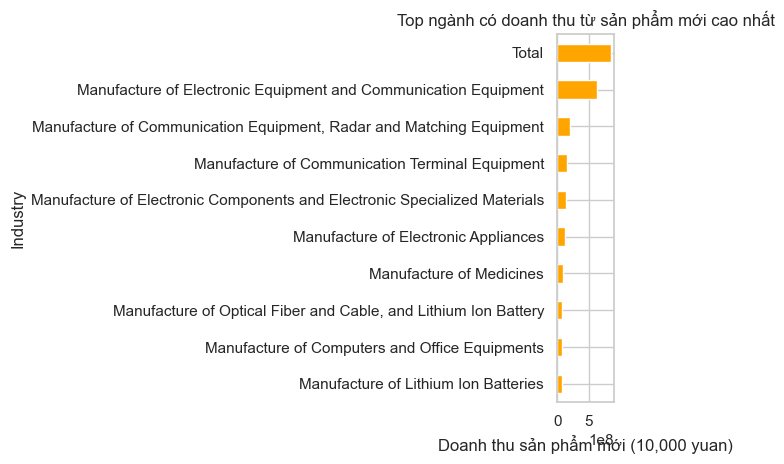

In [35]:
top_revenue = df.sort_values(by='Sales Revenue of New Products (10,000 yuan)', ascending=False).head(10)

plt.figure(figsize=(12,6))
top_revenue.plot(kind='barh', x='Industry', y='Sales Revenue of New Products (10,000 yuan)', legend=False, color='orange')
plt.title('Top ngành có doanh thu từ sản phẩm mới cao nhất')
plt.xlabel('Doanh thu sản phẩm mới (10,000 yuan)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 1. PHÂN TÍCH NGÀNH NÀO ĐÁNG ĐẦU TƯ NHẤT DỰA TRÊN HIỆU QUẢ R&D

In [36]:
df['RODC'] = df['Sales Revenue of New Products (10,000 yuan)'] / df['Expenditure on New Products Development (10,000 yuan)']
top_rodc = df.sort_values(by='RODC', ascending=False).head(10)
print("🔝 Top ngành có hiệu quả R&D cao nhất (RODC):")
print(top_rodc[['Industry', 'RODC']])


🔝 Top ngành có hiệu quả R&D cao nhất (RODC):
                                             Industry       RODC
27                     Manufacture of Entire Computer  28.543358
14  Manufacture of Non-professional Audio-visual E...  18.138058
37               Manufacture of Information Chemicals  15.876784
26     Manufacture of Computers and Office Equipments  15.176765
23    Manufacture of Electronic Specialized Materials  14.568142
24  Manufacturing of Intelligent Consumption Equip...  14.124582
7   Manufacture of Optical Fiber and Cable, and Li...  13.887495
8                Manufacture of Lithium Ion Batteries  13.768505
3   Manufacture of Finished Traditional Chinese He...  13.401552
20  Manufacture of Electronic Components and Elect...  13.380376


## 2: PHÂN TÍCH NGÀNH CÓ TIỀM NĂNG ĐỔI MỚI CÔNG NGHỆ (Innovation Potential)

In [37]:
df['Invention_Efficiency'] = df['Effective Inventions (piece)'] / df['Invention Applications (piece)']
top_innov = df.sort_values(by='Invention_Efficiency', ascending=False).head(10)
print("🔬 Top ngành có hiệu quả chuyển đổi sáng chế cao nhất:")
print(top_innov[['Industry', 'Invention_Efficiency']])


🔬 Top ngành có hiệu quả chuyển đổi sáng chế cao nhất:
                                             Industry  Invention_Efficiency
3   Manufacture of Finished Traditional Chinese He...              6.464858
10      Manufacture of Communication System Equipment              6.118870
30                    Manufacture of Office Equipment              5.225333
9   Manufacture of Communication Equipment, Radar ...              4.933476
1                            Manufacture of Medicines              4.593043
11    Manufacture of Communication Terminal Equipment              4.544041
14  Manufacture of Non-professional Audio-visual E...              4.489362
2                    Manufacture of Chemical Medicine              4.458594
29       Manufacture of Computer Peripheral Equipment              4.279110
21  Manufacture of Resistance, Capacitance and Ind...              4.091824


## 3. NHÓM NGÀNH CÓ DOANH THU SẢN PHẨM MỚI LỚN

In [38]:
top_revenue_new_products = df.sort_values(by='Sales Revenue of New Products (10,000 yuan)', ascending=False).head(10)
print("💰 Top ngành có doanh thu từ sản phẩm mới lớn nhất:")
print(top_revenue_new_products[['Industry', 'Sales Revenue of New Products (10,000 yuan)']])


💰 Top ngành có doanh thu từ sản phẩm mới lớn nhất:
                                             Industry  \
0                                               Total   
5   Manufacture of Electronic Equipment and Commun...   
9   Manufacture of Communication Equipment, Radar ...   
11    Manufacture of Communication Terminal Equipment   
20  Manufacture of Electronic Components and Elect...   
15               Manufacture of Electronic Appliances   
1                            Manufacture of Medicines   
7   Manufacture of Optical Fiber and Cable, and Li...   
26     Manufacture of Computers and Office Equipments   
8                Manufacture of Lithium Ion Batteries   

    Sales Revenue of New Products (10,000 yuan)  
0                                     858901500  
5                                     637578743  
9                                     198339997  
11                                    157508838  
20                                    136951485  
15                   

# III. Giá trị hợp đồng tại thị trường công nghệ kỹ thuật nội địa Trung Quốc

✅ Kích thước dữ liệu: (32, 8)
✅ Danh sách các cột: ['Item', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

🔍 Số lượng giá trị thiếu trong mỗi cột:
Item    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
dtype: int64

📊 Thống kê mô tả các cột số:
               2017          2018          2019          2020          2021  \
count  3.200000e+01  3.200000e+01  3.200000e+01  3.200000e+01  3.200000e+01   
mean   1.906422e+07  2.507099e+07  3.191977e+07  4.005818e+07  5.333026e+07   
std    3.057677e+07  4.117951e+07  5.168242e+07  6.557690e+07  8.758746e+07   
min    9.005800e+04  6.722000e+03  7.404000e+03  3.405000e+04  4.938000e+03   
25%    4.914830e+05  3.751162e+05  9.280660e+05  7.618018e+05  7.806680e+05   
50%    6.053353e+06  6.541778e+06  9.383860e+06  1.265992e+07  1.576298e+07   
75%    1.936066e+07  2.741329e+07  3.482619e+07  4.491528e+07  5.949276e+07   
max    1.342422e+08  1.769742e+08  2.239839e+08  2.825151e+08  3.729430e+08   

        

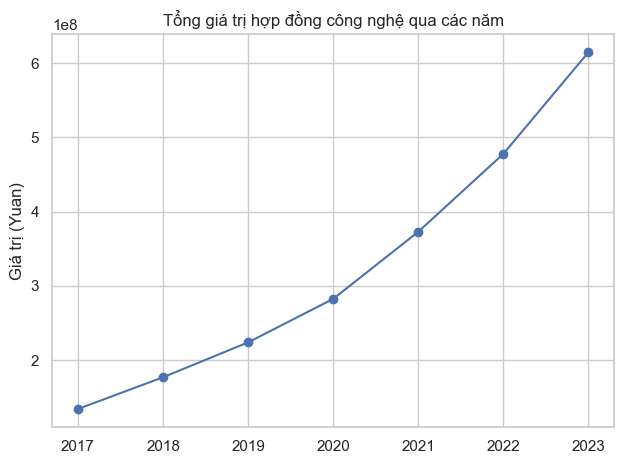

In [42]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv("giatri_hopdong_congnghe_TQ_2023.csv")  # hoặc thay đường dẫn nếu cần

# ✅ Thông tin tổng quan
print("✅ Kích thước dữ liệu:", df.shape)
print("✅ Danh sách các cột:", df.columns.tolist())

# ✅ Kiểm tra dữ liệu bị thiếu
print("\n🔍 Số lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())

# ✅ Thống kê mô tả cho các cột số từ 2017–2023
print("\n📊 Thống kê mô tả các cột số:")
print(df.describe())

# ✅ Nếu muốn trực quan hóa: ví dụ biểu đồ tăng trưởng tổng
import matplotlib.pyplot as plt

df_total = df[df["Item"] == "Total"].iloc[0, 1:]
df_total.plot(kind='line', marker='o', title='Tổng giá trị hợp đồng công nghệ qua các năm', ylabel='Giá trị (Yuan)')
plt.grid(True)
plt.tight_layout()
plt.show()



📊 Thống kê mô tả:
               2017          2018          2019          2020          2021  \
count  3.200000e+01  3.200000e+01  3.200000e+01  3.200000e+01  3.200000e+01   
mean   1.906422e+07  2.507099e+07  3.191977e+07  4.005818e+07  5.333026e+07   
std    3.057677e+07  4.117951e+07  5.168242e+07  6.557690e+07  8.758746e+07   
min    9.005800e+04  6.722000e+03  7.404000e+03  3.405000e+04  4.938000e+03   
25%    4.914830e+05  3.751162e+05  9.280660e+05  7.618018e+05  7.806680e+05   
50%    6.053353e+06  6.541778e+06  9.383860e+06  1.265992e+07  1.576298e+07   
75%    1.936066e+07  2.741329e+07  3.482619e+07  4.491528e+07  5.949276e+07   
max    1.342422e+08  1.769742e+08  2.239839e+08  2.825151e+08  3.729430e+08   

               2022          2023  
count  3.200000e+01  3.200000e+01  
mean   6.815612e+07  8.629763e+07  
std    1.138393e+08  1.481377e+08  
min    3.364000e+03  9.024000e+03  
25%    9.051175e+05  6.507458e+05  
50%    1.873245e+07  1.756756e+07  
75%    8.228224e+

C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_4316\2972524153.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_growth_2023.head(10), x='Growth_2023', y='Item', palette='viridis')


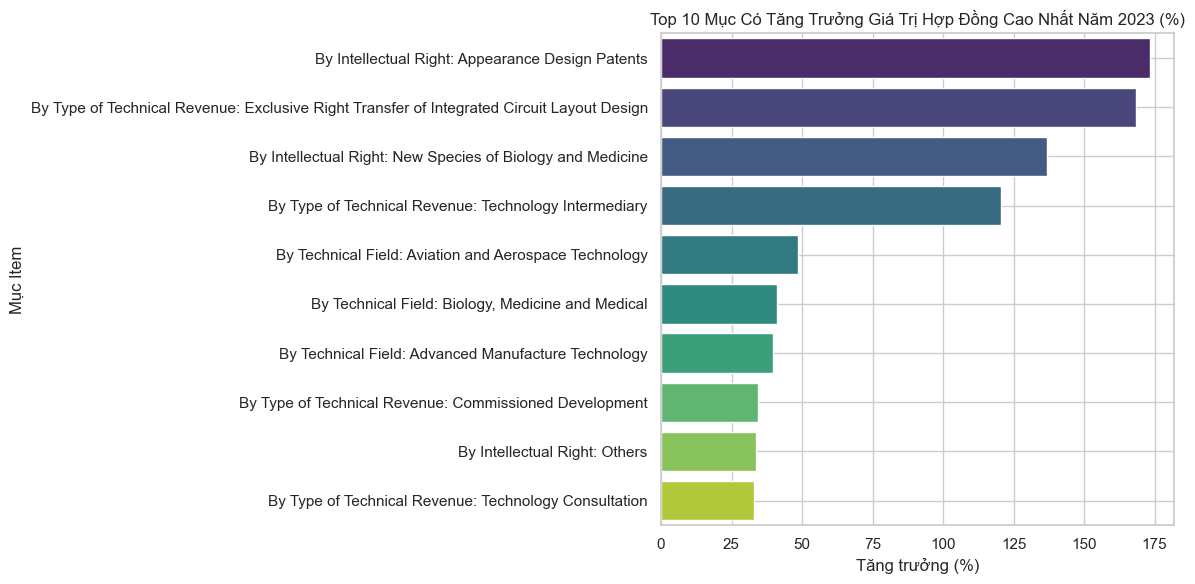


📈 Top 10 mục có CAGR cao nhất 2017–2023:
                                                 Item  CAGR_2017_2023
30  By Technical Field: Advanced Manufacture Techn...       39.472228
20          By Intellectual Right: Inventions Patents       36.990350
19                     By Intellectual Right: Patents       35.866490
21       By Intellectual Right: Utility Model Patents       34.432932
8   By Type of Technical Revenue: Patent Applicati...       33.085640
15  By Type of Technical Revenue: General Technolo...       32.910609
14   By Type of Technical Revenue: Technology Service       32.475341
27                      By Intellectual Right: Others       31.012132
31  By Technical Field: Biology, Medicine and Medical       28.944150
0                                               Total       28.865203


C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_4316\2972524153.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cagr.head(10), x='CAGR_2017_2023', y='Item', palette='mako')


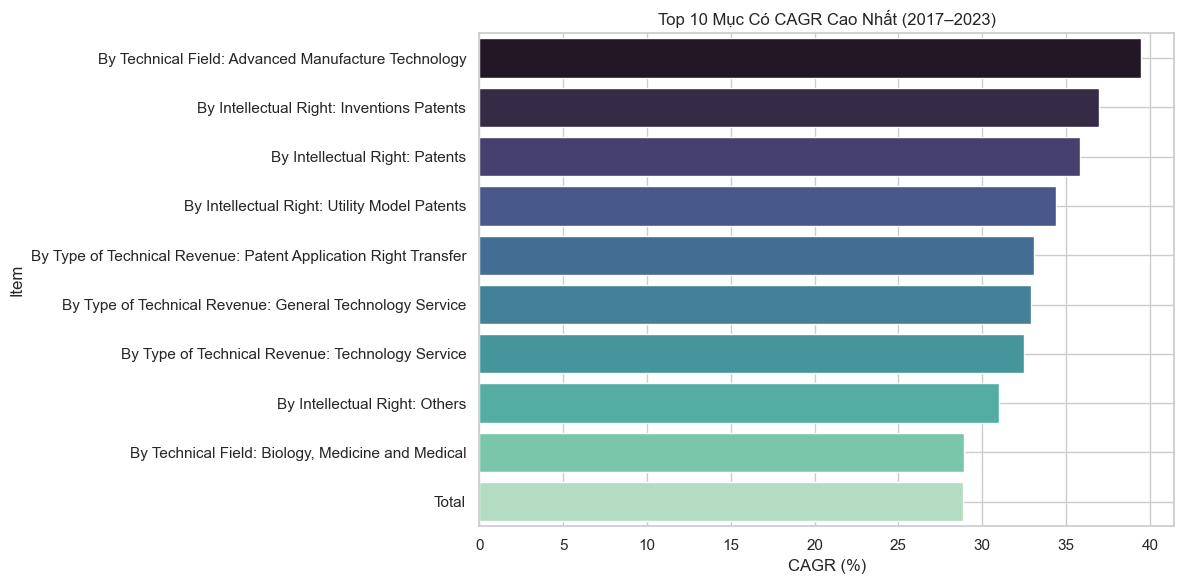

In [43]:
# 3️⃣ Thống kê mô tả
# -----------------------------
print("\n📊 Thống kê mô tả:")
print(df.describe())

# -----------------------------
# 4️⃣ Tính tăng trưởng % theo năm (YOY)
# -----------------------------
df_growth = df.copy()
for year in range(2018, 2024):
    df_growth[f'Growth_{year}'] = (df[str(year)] - df[str(year-1)]) / df[str(year-1)] * 100

# Xem các mục có tốc độ tăng trưởng cao nhất năm gần nhất (2023)
top_growth_2023 = df_growth[['Item', 'Growth_2023']].sort_values(by='Growth_2023', ascending=False)
print("\n🚀 Top 10 mục tăng trưởng cao nhất 2023:")
print(top_growth_2023.head(10))

# -----------------------------
# 5️⃣ Vẽ biểu đồ tăng trưởng từng nhóm
# -----------------------------
plt.figure(figsize=(12, 6))
sns.barplot(data=top_growth_2023.head(10), x='Growth_2023', y='Item', palette='viridis')
plt.title('Top 10 Mục Có Tăng Trưởng Giá Trị Hợp Đồng Cao Nhất Năm 2023 (%)')
plt.xlabel('Tăng trưởng (%)')
plt.ylabel('Mục Item')
plt.tight_layout()
plt.grid(True)
plt.show()

# -----------------------------
# 6️⃣ Tính CAGR (tăng trưởng kép hàng năm)
# -----------------------------
df['CAGR_2017_2023'] = ((df['2023'] / df['2017']) ** (1/6) - 1) * 100

# Top mục có CAGR cao nhất
top_cagr = df[['Item', 'CAGR_2017_2023']].sort_values(by='CAGR_2017_2023', ascending=False)
print("\n📈 Top 10 mục có CAGR cao nhất 2017–2023:")
print(top_cagr.head(10))

# Vẽ biểu đồ CAGR
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cagr.head(10), x='CAGR_2017_2023', y='Item', palette='mako')
plt.title('Top 10 Mục Có CAGR Cao Nhất (2017–2023)')
plt.xlabel('CAGR (%)')
plt.tight_layout()
plt.grid(True)
plt.show()

C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_4316\385308525.py:40: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\Hưng Tăng\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


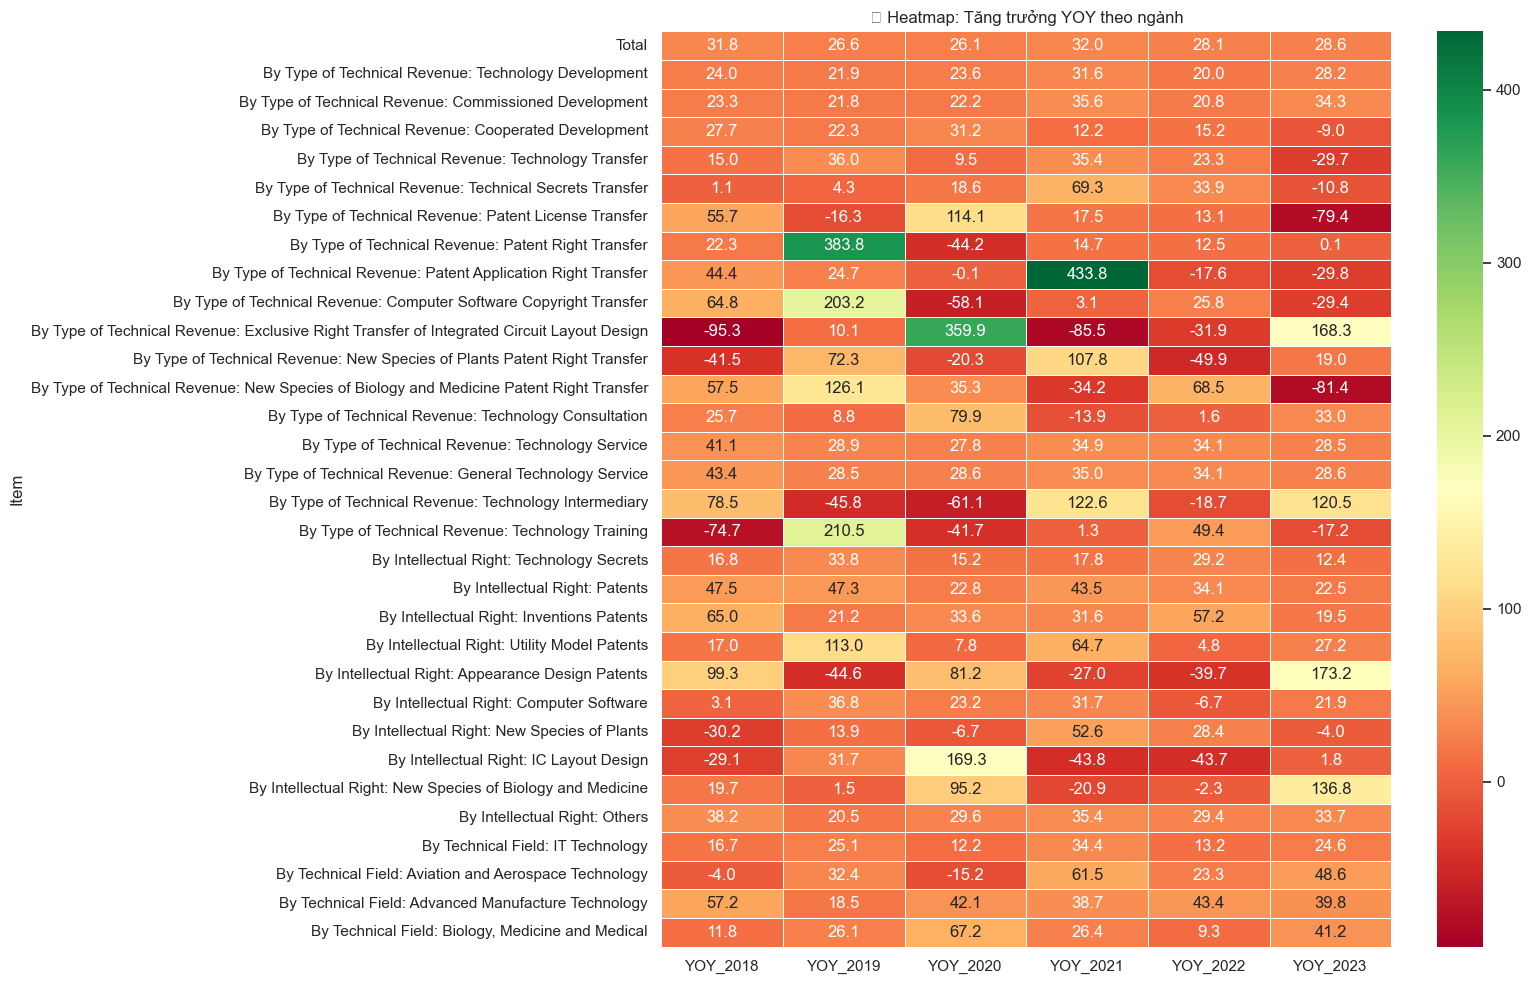


✅ Ngành tăng trưởng liên tục 3 năm gần nhất:
                                                 Item   YOY_2018    YOY_2019  \
0                                               Total  31.831983   26.563005   
1   By Type of Technical Revenue: Technology Devel...  24.007372   21.886150   
2   By Type of Technical Revenue: Commissioned Dev...  23.314509   21.812086   
7   By Type of Technical Revenue: Patent Right Tra...  22.334555  383.807113   
14   By Type of Technical Revenue: Technology Service  41.141644   28.890908   
15  By Type of Technical Revenue: General Technolo...  43.365709   28.497519   
18          By Intellectual Right: Technology Secrets  16.761958   33.799928   
19                     By Intellectual Right: Patents  47.451767   47.326397   
20          By Intellectual Right: Inventions Patents  64.962708   21.245483   
21       By Intellectual Right: Utility Model Patents  16.966398  113.013494   
27                      By Intellectual Right: Others  38.235089   20.4656

C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_4316\385308525.py:65: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
C:\Users\Hưng Tăng\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


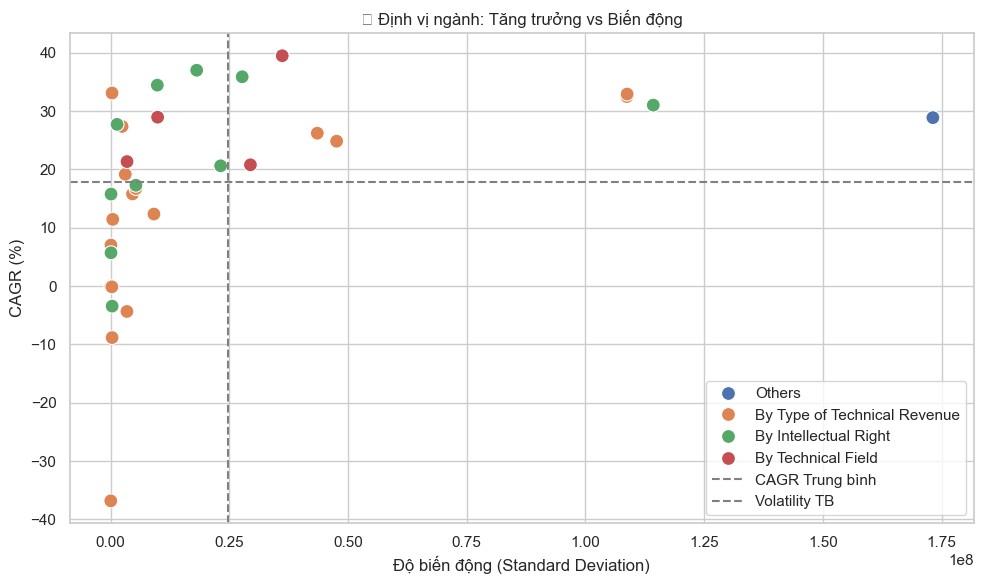


💎 Ngành có tăng trưởng cao và ổn định (Low risk - High return):
                                                 Item       CAGR       Std_Dev
20          By Intellectual Right: Inventions Patents  36.990350  1.814722e+07
21       By Intellectual Right: Utility Model Patents  34.432932  9.846730e+06
8   By Type of Technical Revenue: Patent Applicati...  33.085640  3.167218e+05
31  By Technical Field: Biology, Medicine and Medical  28.944150  9.913560e+06
26  By Intellectual Right: New Species of Biology ...  27.710191  1.374206e+06
7   By Type of Technical Revenue: Patent Right Tra...  27.356544  2.429326e+06
29  By Technical Field: Aviation and Aerospace Tec...  21.332146  3.471315e+06
18          By Intellectual Right: Technology Secrets  20.609198  2.318654e+07
13  By Type of Technical Revenue: Technology Consu...  19.157657  3.099256e+06


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv("giatri_hopdong_congnghe_TQ_2023.csv")

# ------------------------
# 1. Tiền xử lý
# ------------------------
df.columns = df.columns.astype(str)
df_years = [str(year) for year in range(2017, 2024)]
df[df_years] = df[df_years].apply(pd.to_numeric, errors='coerce')

# ------------------------
# 2. Nhóm ngành tự động từ tên 'Item'
# ------------------------
df['Group'] = df['Item'].apply(lambda x: x.split(":")[0] if ":" in x else "Others")

# ------------------------
# 3. Tính CAGR và biến động
# ------------------------
df['CAGR'] = ((df['2023'] / df['2017']) ** (1/6) - 1) * 100
df['Std_Dev'] = df[df_years].std(axis=1)
df['Mean'] = df[df_years].mean(axis=1)

# ------------------------
# 4. Heatmap tăng trưởng YOY
# ------------------------
df_growth = df[['Item'] + df_years].copy()
for year in range(2018, 2024):
    df_growth[f'YOY_{year}'] = ((df[str(year)] - df[str(year-1)]) / df[str(year-1)]) * 100

growth_cols = [col for col in df_growth.columns if 'YOY' in col]
df_yoy_heatmap = df_growth.set_index('Item')[growth_cols]

plt.figure(figsize=(16, 10))
sns.heatmap(df_yoy_heatmap, cmap='RdYlGn', annot=True, fmt=".1f", linewidths=0.5)
plt.title("📈 Heatmap: Tăng trưởng YOY theo ngành")
plt.tight_layout()
plt.show()

# ------------------------
# 5. Phát hiện ngành tăng liên tục 3 năm gần nhất
# ------------------------
def check_consecutive_growth(row):
    return all(row[f'YOY_{y}'] > 0 for y in [2021, 2022, 2023])
df_growth['SustainedGrowth_3Y'] = df_growth.apply(check_consecutive_growth, axis=1)

print("\n✅ Ngành tăng trưởng liên tục 3 năm gần nhất:")
print(df_growth[df_growth['SustainedGrowth_3Y']][['Item'] + growth_cols])

# ------------------------
# 6. Biểu đồ ngành 'High CAGR - Low Volatility' → đầu tư lý tưởng
# ------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Std_Dev', y='CAGR', hue='Group', s=100)
plt.axhline(df['CAGR'].mean(), linestyle='--', color='gray', label='CAGR Trung bình')
plt.axvline(df['Std_Dev'].mean(), linestyle='--', color='gray', label='Volatility TB')
plt.title("🎯 Định vị ngành: Tăng trưởng vs Biến động")
plt.xlabel("Độ biến động (Standard Deviation)")
plt.ylabel("CAGR (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------
# 7. Top ngành đáng chú ý
top_stable = df[(df['CAGR'] > df['CAGR'].mean()) & (df['Std_Dev'] < df['Std_Dev'].mean())]
print("\n💎 Ngành có tăng trưởng cao và ổn định (Low risk - High return):")
print(top_stable[['Item', 'CAGR', 'Std_Dev']].sort_values(by='CAGR', ascending=False))


# 📈 Phân Tích Tác Động Từ Thị Trường Công Nghệ Kỹ Thuật Nội Địa Trung Quốc (2017–2023) Đến Đầu Tư Tại Việt Nam

## 1. 🚀 Tổng quan tăng trưởng mạnh mẽ
- Tổng giá trị hợp đồng thị trường công nghệ kỹ thuật của Trung Quốc tăng trưởng mạnh:
  - **Tốc độ tăng trưởng CAGR toàn thị trường: ~28.9%**
  - Cho thấy nhu cầu đổi mới công nghệ và đầu tư R&D ngày càng lớn.

✅ Điều này mở ra **cơ hội đầu tư gián tiếp tại Việt Nam**:
- Doanh nghiệp Việt Nam có thể **tham gia chuỗi cung ứng công nghệ, gia công sản phẩm phần cứng, thiết bị công nghiệp hoặc phần mềm**.
- Tăng khả năng **thu hút đầu tư FDI từ Trung Quốc** trong lĩnh vực công nghệ cao, thiết bị máy móc.

---

## 2. 💥 Ngành tăng trưởng mạnh – Cơ hội đầu tư liên quan tại Việt Nam

### 🔝 Top ngành tăng trưởng mạnh nhất:
| Ngành (Item) | CAGR 2017–2023 |
|-------------|----------------|
| Advanced Manufacturing Technology | **+39.47%** |
| Invention Patents | **+36.99%** |
| General Technology Service | **+32.91%** |
| Technology Service | **+32.47%** |
| Utility Model Patents | **+34.43%** |

🎯 **Tác động đến Việt Nam**:
- Việt Nam nên đẩy mạnh **ngành công nghiệp hỗ trợ**, đặc biệt **chế tạo máy móc chính xác**, **linh kiện điện tử**, **robot công nghiệp**, **thiết bị y tế**.
- Doanh nghiệp như: **FPT, REE, RAL, DIGIWORLD, CMC, VNDIRECT, VHC, AN PHAT, VNM** có thể hưởng lợi từ nhu cầu công nghệ tăng.

---

## 3. 📈 Mục tăng trưởng đột biến 2023 – Gợi ý đầu tư nhanh

| Item | Tăng trưởng 2023 |
|----------------|----------------|
| Appearance Design Patents | **+173%** |
| Exclusive Right Transfer of IC Layout Design | **+168%** |
| New Species of Biology and Medicine | **+137%** |
| Technology Intermediary | **+121%** |

✅ **Tác động gợi ý**:
- **Đầu tư vào đổi mới sáng tạo**, **thiết kế IC**, **công nghệ sinh học y tế**, **dịch vụ kết nối công nghệ** (startup, innovation hub).
- Việt Nam nên tập trung phát triển các **khu công nghệ cao**, **trung tâm thiết kế IC**, **vườn ươm khởi nghiệp công nghệ**.

---

## 4. 📊 Xu hướng tăng trưởng liên tục 3 năm gần đây

| Item | Tăng trưởng YoY liên tục |
|-------------------------------|-------------------------------|
| Technology Development | Tăng mạnh 3 năm liên tiếp |
| Invention & Utility Model Patents | Tăng liên tục và cao |
| IT Technology | Vẫn tăng mạnh, tiềm năng xuất khẩu dịch vụ IT |

👉 **Việt Nam có thể đẩy mạnh phát triển:**
- **Doanh nghiệp phần mềm, AI, điện tử** như **FPT Software, MISA, TMA, NashTech**.
- **Startup Deeptech, R&D AI, sinh học, chip thiết kế** cần hỗ trợ chính sách và vốn.

---

## 5. 📌 Chiến lược đầu tư đề xuất cho Việt Nam

- Ưu tiên đầu tư các doanh nghiệp:
  - Có định hướng **công nghệ cao**, **xuất khẩu thiết bị kỹ thuật**, **dịch vụ R&D, AI, ICT**.
  - Tham gia chuỗi cung ứng công nghệ cho Trung Quốc.
- Mở rộng hợp tác chính phủ – doanh nghiệp – viện nghiên cứu để:
  - **Tăng năng lực thiết kế công nghệ**
  - **Tăng sản lượng và chất lượng đổi mới sáng tạo**
  - **Thu hút vốn FDI công nghệ sâu**

---

## ✅ Kết luận
Thị trường công nghệ kỹ thuật Trung Quốc đang tăng trưởng bùng nổ và **sẽ tạo ra làn sóng lan tỏa đến khu vực**, trong đó **Việt Nam có thể trở thành mắt xích quan trọng** nếu biết nắm bắt cơ hội. Đây là **tín hiệu tích cực cho nhà đầu tư trung – dài hạn**, nhất là khi kết hợp cùng các yếu tố vĩ mô thuận lợi trong khu vực ASEAN.


## 4. Xuất nhập khẩu của Trung Quốc

📊 Thống kê mô tả:
       Exports_2022  Exports_2023  Imports_2022  Imports_2023  \
count     44.000000     44.000000     44.000000     44.000000   
mean     113.009091     96.345455    111.356818    101.393182   
std       14.501753      6.832598     11.937500      9.907465   
min       88.200000     76.400000     75.200000     76.800000   
25%      108.150000     93.150000    103.600000     94.800000   
50%      110.350000     97.500000    109.900000    101.550000   
75%      113.925000    100.625000    116.500000    108.775000   
max      164.800000    108.000000    148.000000    120.500000   

       Export_Change_%  Import_Change_%  
count        44.000000        44.000000  
mean        -13.529800        -7.530709  
std          11.427123        15.563969  
min         -46.844660       -41.950113  
25%         -16.373938       -15.803266  
50%         -12.311987        -6.639051  
75%          -8.836649         0.485079  
max           4.347826        39.095745  

📈 Top ngành TĂNG 

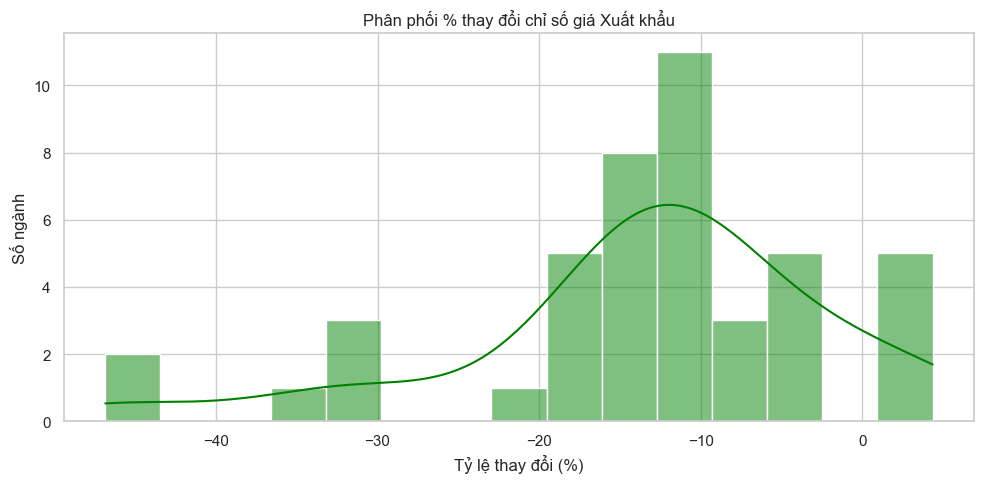

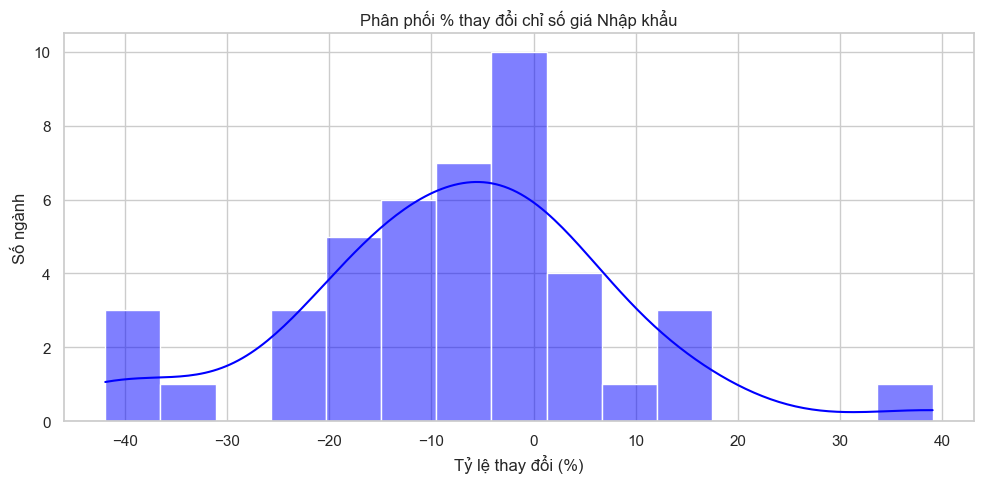

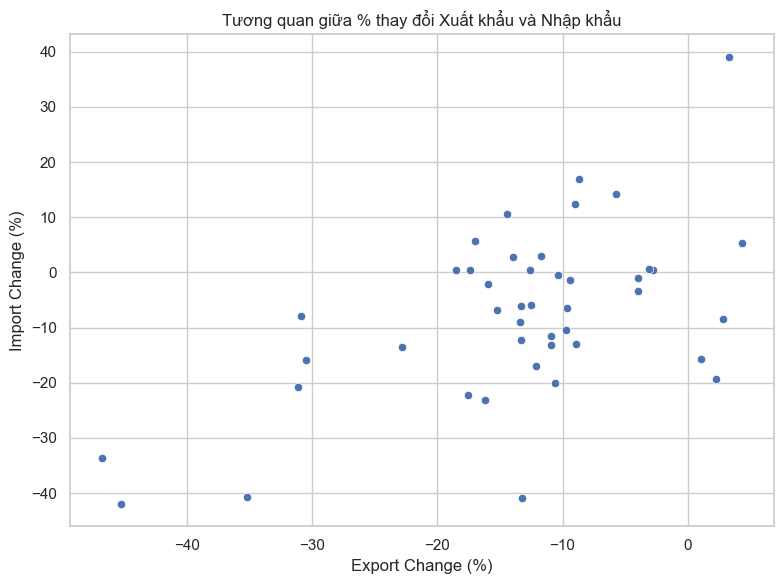


🧐 Ngành có xu hướng NGHỊCH CHIỀU: Xuất khẩu tăng - Nhập khẩu giảm:
                                            Industry  Export_Change_%  \
0  Agriculture, Forestry, Animal Husbandry and Fi...         1.095618   
1                                            Farming         2.300000   
3                                   Animal Husbandry         2.813853   

   Import_Change_%  
0       -15.761821  
1       -19.259882  
3        -8.529412  


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV
df = pd.read_csv("price_index_analysis.csv")

# 1. Thống kê mô tả cơ bản
print("📊 Thống kê mô tả:")
print(df.describe())

# 2. Tìm ngành tăng/giảm mạnh
top_export_up = df.sort_values(by="Export_Change_%", ascending=False).head(5)
top_export_down = df.sort_values(by="Export_Change_%").head(5)
top_import_up = df.sort_values(by="Import_Change_%", ascending=False).head(5)
top_import_down = df.sort_values(by="Import_Change_%").head(5)

print("\n📈 Top ngành TĂNG chỉ số giá xuất khẩu:")
print(top_export_up[["Industry", "Export_Change_%"]])

print("\n📉 Top ngành GIẢM chỉ số giá xuất khẩu:")
print(top_export_down[["Industry", "Export_Change_%"]])

print("\n📈 Top ngành TĂNG chỉ số giá nhập khẩu:")
print(top_import_up[["Industry", "Import_Change_%"]])

print("\n📉 Top ngành GIẢM chỉ số giá nhập khẩu:")
print(top_import_down[["Industry", "Import_Change_%"]])

# 3. Phân phối các thay đổi
plt.figure(figsize=(10, 5))
sns.histplot(df["Export_Change_%"], kde=True, bins=15, color='green')
plt.title("Phân phối % thay đổi chỉ số giá Xuất khẩu")
plt.xlabel("Tỷ lệ thay đổi (%)")
plt.ylabel("Số ngành")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df["Import_Change_%"], kde=True, bins=15, color='blue')
plt.title("Phân phối % thay đổi chỉ số giá Nhập khẩu")
plt.xlabel("Tỷ lệ thay đổi (%)")
plt.ylabel("Số ngành")
plt.tight_layout()
plt.show()

# 4. Tương quan giữa xuất và nhập khẩu
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Export_Change_%", y="Import_Change_%")
plt.title("Tương quan giữa % thay đổi Xuất khẩu và Nhập khẩu")
plt.xlabel("Export Change (%)")
plt.ylabel("Import Change (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Ngành có xu hướng nghịch đảo (xuất tăng, nhập giảm và ngược lại)
inverse_trend = df[(df["Export_Change_%"] > 0) & (df["Import_Change_%"] < 0)]
print("\n🧐 Ngành có xu hướng NGHỊCH CHIỀU: Xuất khẩu tăng - Nhập khẩu giảm:")
print(inverse_trend[["Industry", "Export_Change_%", "Import_Change_%"]])


### 📊 Phân Tích Tác Động Biến Động Chỉ Số Giá Xuất Nhập Khẩu Của Trung Quốc (2022 → 2023)

#### 1. Các ngành Trung Quốc giảm mạnh giá xuất khẩu – Tác động đến Việt Nam

##### 🔻 Top 5 ngành giảm chỉ số giá xuất khẩu
| Ngành | Tỷ lệ giảm |
|-------|------------|
| Processing of Petroleum, Coal and Other Fuels | -46.84% |
| Mining and Washing of Coal | -45.31% |
| Extraction of Petroleum and Natural Gas | -35.19% |
| Smelting and Pressing of Ferrous Metals | -31.15% |
| Utilization of Waste Resources | -30.92% |

##### 💡 Tác động tiềm năng đến Việt Nam:
- Giảm giá nguyên vật liệu đầu vào → giảm chi phí sản xuất.
- Hưởng lợi: ngành **thép**, **năng lượng**, **xây dựng**, **vận tải**, **nhựa**.
- Cổ phiếu ngành nguyên liệu cơ bản ở Việt Nam có thể tăng giá.
- Rủi ro: **cạnh tranh giá xuất khẩu** nếu Trung Quốc giảm giá để chiếm thị phần.

---

#### 2. Các ngành Trung Quốc tăng mạnh giá nhập khẩu – Cơ hội cho Việt Nam

##### 🔺 Top 5 ngành tăng chỉ số giá nhập khẩu
| Ngành | Tỷ lệ tăng |
|-------|------------|
| Mining and Processing of Ferrous Metal Ores | +39.10% |
| Culture, Sports and Entertainment | +17.00% |
| Manufacture of Special Purpose Machinery | +14.17% |
| Manufacture of General Purpose Machinery | +12.44% |
| Manufacture of Tobacco | +10.65% |

##### 💡 Cơ hội cho Việt Nam:
- Tăng khả năng **xuất khẩu nguyên vật liệu hoặc sản phẩm ngành phù hợp**.
- Đặc biệt là ngành: **kim loại, cơ khí, thể thao – giải trí**.
- Gia tăng đơn hàng từ doanh nghiệp Trung Quốc → tác động tích cực đến doanh thu các doanh nghiệp liên quan tại Việt Nam.

---

#### 3. Tác động đến thị trường chứng khoán Việt Nam

| Xu hướng | Tác động đến cổ phiếu Việt Nam |
|---------|------------------|
| Giá nguyên liệu đầu vào giảm | Doanh nghiệp sản xuất tăng biên lợi nhuận |
| Giá máy móc nhập khẩu tăng | Ngành công nghiệp có thể chịu áp lực chi phí |

---

#### 4. Chiến lược đầu tư gợi ý
- Ưu tiên cổ phiếu ngành **vật liệu xây dựng**, **năng lượng**, **xi măng**, **hóa chất**, **thép**.
- Theo dõi diễn biến giá nhập khẩu & xuất khẩu của Việt Nam đối ứng với Trung Quốc.
- Kết hợp dữ liệu tài chính doanh nghiệp (P/E, P/B, ROE, EPS, lợi nhuận sau thuế).

---

#### ✅ Gợi ý tiếp theo:
- Thu thập thêm dữ liệu: giá nhập khẩu nguyên liệu của Việt Nam, chỉ số PMI, tồn kho doanh nghiệp.
- Kết hợp thêm báo cáo ngành của Bộ Công thương & Tổng cục Hải Quan Việt Nam.


# 📊 Danh mục đầu tư chứng khoán tại Việt Nam dựa trên xu hướng công nghệ & giá xuất nhập khẩu Trung Quốc

## 1️⃣ Nhóm ngành hưởng lợi từ xu hướng công nghệ Trung Quốc

| Mã cổ phiếu | Doanh nghiệp | Lý do chọn đầu tư |
|-------------|---------------|--------------------|
| FPT         | Tập đoàn FPT  | Dẫn đầu công nghệ, phần mềm, dịch vụ AI, xuất khẩu ICT |
| CMG         | CMC Corp      | Hạ tầng số, điện toán đám mây, bảo mật |
| VGI         | Viettel Global | Viễn thông quốc tế, chuyển đổi số |
| DGW         | Digiworld     | Phân phối thiết bị công nghệ, hưởng lợi từ chuỗi cung ứng |
| CMC Telecom | (Private)     | Hạ tầng data center, dịch vụ cloud |

---

## 2️⃣ Nhóm ngành hưởng lợi từ xu hướng Advanced Manufacturing – Patents – Utility Models

| Mã cổ phiếu | Doanh nghiệp | Lý do chọn đầu tư |
|-------------|---------------|--------------------|
| REE         | Cơ điện lạnh REE | Tự động hóa, cơ điện, cơ khí chính xác |
| HPG         | Hòa Phát      | Sản xuất công nghiệp, chuỗi cung ứng nguyên vật liệu |
| STK         | Sợi Thế Kỷ    | Công nghệ dệt – sợi xuất khẩu cao cấp |
| DGC         | Dược Hà Nội – Hóa chất Đức Giang | Nguyên liệu sản xuất, hóa chất công nghiệp |

---

## 3️⃣ Nhóm ngành hưởng lợi từ giá nguyên vật liệu giảm

| Mã cổ phiếu | Doanh nghiệp | Lý do chọn đầu tư |
|-------------|---------------|--------------------|
| BCC         | Xi măng Bỉm Sơn | Giá than, nguyên liệu giảm giúp biên lợi nhuận tăng |
| HT1         | Xi măng Hà Tiên | Cùng hưởng lợi từ chi phí đầu vào giảm |
| PVD         | Khoan Dầu khí | Chi phí khoan giảm khi giá dầu thô và than giảm |
| DPM         | Phân bón Phú Mỹ | Nguyên liệu đầu vào giảm, cải thiện lợi nhuận |

---

## 4️⃣ Nhóm ngành hưởng lợi từ giá nhập khẩu máy móc tăng – Tăng nhu cầu nội địa hóa

| Mã cổ phiếu | Doanh nghiệp | Lý do chọn đầu tư |
|-------------|---------------|--------------------|
| TNA         | Thiên Nam     | Kinh doanh máy móc thiết bị, cơ khí |
| TCM         | Dệt may Thành Công | Tăng khả năng sản xuất nội địa, xuất khẩu ngành may mặc |
| SMC         | Thép SMC      | Thép và cơ khí chế tạo – thay thế nhập khẩu |
| HAX         | Hàng Xanh (ô tô) | Cơ hội tăng giá sản phẩm nội địa khi hàng nhập khẩu đắt hơn |

---

## 5️⃣ Nhóm ngành liên quan đến xuất khẩu – tăng đơn hàng từ Trung Quốc

| Mã cổ phiếu | Doanh nghiệp | Lý do chọn đầu tư |
|-------------|---------------|--------------------|
| VHC         | Vĩnh Hoàn     | Xuất khẩu thủy sản sang thị trường Trung Quốc và EU |
| ANV         | Nam Việt      | Thị phần cá tra lớn tại Trung Quốc |
| TCM         | Thành Công    | May mặc xuất khẩu |
| LHC         | Long Hậu IP   | KCN hưởng lợi từ FDI công nghệ cao chuyển dịch |

---

## ✅ Chiến lược đầu tư đề xuất:
- Tập trung nhóm **tăng trưởng công nghệ dài hạn + chuỗi cung ứng toàn cầu**.
- Chọn cổ phiếu có **ROE cao, P/E hợp lý, dư địa tăng trưởng dài hạn**.
- **Theo dõi biến động giá nguyên vật liệu thế giới**, tận dụng thời điểm giá thấp để đầu tư cổ phiếu sản xuất.

---

### 📌 Gợi ý tiếp theo:
- Theo dõi thêm: PMI Việt Nam, FDI ngành công nghiệp chế biến, báo cáo ngành logistics – công nghệ – bán lẻ.
- Phân bổ danh mục 60% tăng trưởng – 40% phòng thủ để đảm bảo ổn định dòng vốn.

